In [26]:
#Dependancies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [27]:
# Loading dataset
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [28]:
#Discard all cryptocurrencies that are not being traded. 
#In other words, filter for currencies that are currently being traded. 
df_crypto_new = df_crypto.loc[df_crypto['IsTrading'] != 'FALSE'] 
df_crypto_new

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [29]:
#drop the `IsTrading` column from the dataframe.
df_crypto_new.drop('IsTrading', axis=1, inplace=True)  

In [30]:
df_crypto_new

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,PoW/PoS,NaN,21000000


In [31]:
#drop rows with null values
df_crypto_new = df_crypto_new.dropna(how='any',axis=0)

In [32]:
df_crypto_new

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [33]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero
df_crypto_new = df_crypto_new.loc[df_crypto['TotalCoinsMined'] > 0] 
df_crypto_new

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [34]:
#In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data,
#delete the `CoinName` from the original dataframe.
df_crypto_new.drop('CoinName', axis=1, inplace=True)  

C:\Users\doyel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
df_crypto_new

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000
1247,XBC,Scrypt,PoS,1.283270e+05,1000000


In [36]:
df_crypto_new.drop('Unnamed: 0', axis=1, inplace=True)  

C:\Users\doyel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
df_crypto_new

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [38]:
#features with text values, `Algorithm` and `ProofType`, into numerical data using Pandas to create dummy variables.
df_crypto_dummies = pd.get_dummies(df_crypto_new)
print(df_crypto_dummies.columns)


Index(['TotalCoinsMined', 'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash',
       ...
       'TotalCoinSupply_91388946', 'TotalCoinSupply_92000000000',
       'TotalCoinSupply_9354000', 'TotalCoinSupply_9507271',
       'TotalCoinSupply_9736000', 'TotalCoinSupply_98000000',
       'TotalCoinSupply_98100000000', 'TotalCoinSupply_990000000000',
       'TotalCoinSupply_999481516', 'TotalCoinSupply_9999999'],
      dtype='object', length=395)


In [39]:
#no of columns increased from 4 to 395
df_crypto_dummies

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1.283270e+05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler().fit(df_crypto_dummies)
df_crypto_scaled = scaler.transform(df_crypto_dummies)
df_crypto_scaled

array([[-0.11450078, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.09041991, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [ 0.55369883, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       ...,
       [-0.11433426, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11449785, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11401032, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667]])

In [54]:
# Applying PCA to reduce dimensions 
# Initialize PCA model
pca = PCA(n_components=0.99)

crypto_pca = pca.fit_transform(df_crypto_scaled)

In [56]:
pca_array = pca.explained_variance_ratio_

In [60]:
len(pca_array)

341

In [61]:
# Applying PCA to reduce dimensions 

# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components 
crypto_pca = pca.fit_transform(df_crypto_scaled)

In [62]:
pca_array = pca.explained_variance_ratio_

In [63]:
len(pca_array)

289

In [66]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca
)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
0,-0.261333,-0.122352,3.881253e-16,-3.809223e-15,0.026839,1.605255,-0.354895,-0.001351,-1.768892,-0.378226,...,-2.872460e+00,6.674218e-01,-5.297110e-02,2.467829e-01,2.946184e+00,2.154455e-01,2.479996e+00,-3.481082e+00,8.313295e-01,7.296886e-03
1,-0.243450,-0.123261,3.243887e-16,-4.050463e-15,0.022310,1.604416,-0.354804,-0.001201,-1.771094,-0.378647,...,3.954272e+00,-5.221060e-01,2.285816e-02,9.892656e-01,2.432808e-01,1.318638e+00,-1.582198e+00,2.719315e-01,2.198779e+00,-6.632811e-01
2,0.332290,-0.030649,-1.565357e-14,-5.498827e-15,-0.091428,2.491156,-0.425823,-0.439972,-1.260462,0.023074,...,-2.272721e+00,1.104309e+00,-8.437274e-01,-1.929393e+00,1.224631e-01,3.147059e-02,2.468756e+00,-1.427495e-01,2.287253e-01,3.009105e+00
3,-0.235780,-0.198558,8.217563e-15,-4.354648e-15,-0.000017,-1.605821,0.178580,-0.072748,0.188912,0.195701,...,-9.409836e-16,-2.003826e-15,2.160141e-15,7.287084e-16,-3.753508e-16,5.195611e-15,-3.268680e-15,-2.762999e-16,2.341381e-15,-1.773630e-15
4,-0.088280,-0.202033,5.506056e-15,4.170236e-15,-0.049494,-1.586103,0.161483,-0.019558,0.314580,0.028037,...,-1.825762e-15,1.175578e-15,8.810317e-16,-3.753508e-16,2.048790e-15,-1.457091e-15,1.423205e-15,2.372008e-16,-5.421734e-16,-3.857772e-16


In [99]:
from sklearn.manifold import TSNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=850)

In [100]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)

In [101]:
tsne_features.shape

(577, 2)

In [102]:
# Prepare to plot the dataset

# The first column of transformed features
df_crypto_pca['0'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['1'] = tsne_features[:,1]

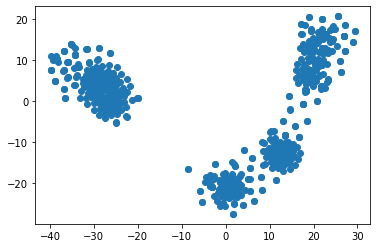

In [103]:
# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(df_crypto_pca['0'], df_crypto_pca['1'])
plt.show()

C:\Users\doyel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


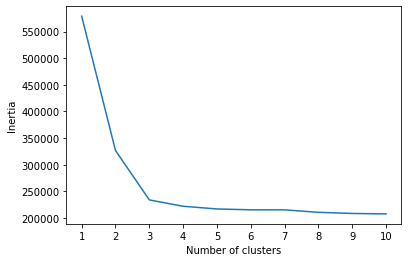

In [105]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [107]:
# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)

# Add the predicted class columns
df_crypto_pca["class"] = model.labels_
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,282,283,284,285,286,287,288,0,1,class
0,-0.261333,-0.122352,3.881253e-16,-3.809223e-15,0.026839,1.605255,-0.354895,-0.001351,-1.768892,-0.378226,...,2.467829e-01,2.946184e+00,2.154455e-01,2.479996e+00,-3.481082e+00,8.313295e-01,7.296886e-03,-29.754827,1.986263,1
1,-0.243450,-0.123261,3.243887e-16,-4.050463e-15,0.022310,1.604416,-0.354804,-0.001201,-1.771094,-0.378647,...,9.892656e-01,2.432808e-01,1.318638e+00,-1.582198e+00,2.719315e-01,2.198779e+00,-6.632811e-01,-30.569357,1.019825,1
2,0.332290,-0.030649,-1.565357e-14,-5.498827e-15,-0.091428,2.491156,-0.425823,-0.439972,-1.260462,0.023074,...,-1.929393e+00,1.224631e-01,3.147059e-02,2.468756e+00,-1.427495e-01,2.287253e-01,3.009105e+00,18.495909,13.488801,0
3,-0.235780,-0.198558,8.217563e-15,-4.354648e-15,-0.000017,-1.605821,0.178580,-0.072748,0.188912,0.195701,...,7.287084e-16,-3.753508e-16,5.195611e-15,-3.268680e-15,-2.762999e-16,2.341381e-15,-1.773630e-15,12.583691,-12.797782,2
4,-0.088280,-0.202033,5.506056e-15,4.170236e-15,-0.049494,-1.586103,0.161483,-0.019558,0.314580,0.028037,...,-3.753508e-16,2.048790e-15,-1.457091e-15,1.423205e-15,2.372008e-16,-5.421734e-16,-3.857772e-16,-3.132482,-19.073536,2


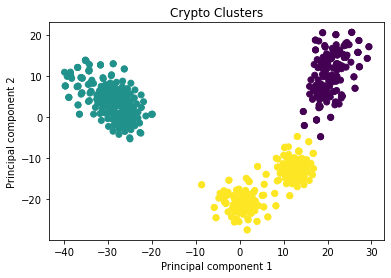

In [108]:
# Visualize the clusters
plt.scatter(x=df_crypto_pca['0'], y=df_crypto_pca['1'], c=df_crypto_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Crypto Clusters')
plt.show()

### Can the cryptocurrencies be clustered together? If so, into how many clusters?

### Yes, above analysis shows cryptocurrencies can be clustered together into three different clusters.